<a href="https://colab.research.google.com/github/urvog/titaniclogistic/blob/main/Unidad_II_Tema_4_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 3. Regresión Logística

<img src="https://www.neuraldojo.org/media/titanic.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

Este es un conjunto de datos clásico utilizado en muchos tutoriales y demostraciones de minería de datos, perfecto para comenzar con el análisis exploratorio y construir modelos de clasificación binaria para predecir la supervivencia.

Los datos cubren solo a los pasajeros, no a la tripulación.

Características
- Survived - Supervivencia (0 = No; 1 = Sí)
- pclass - Clase de Pasajero (1 = 1ra; 2 = 2da; 3 = 3ra)
- name nombre
- sex - sexo
- age - edad
- sibsp - Número de hermanos/cónyuges a bordo
- parch - Número de padres/hijos a bordo
- ticket - Número de billete
- fare - Tarifa de Pasajero
- cabin - cabina
- embarked - Puerto de embarque (C = Cherburgo; Q = Queenstown; S = - Southampton)

In [297]:
#Importamos las librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


##1.- Importamos los Datos

In [298]:
!wget https://www.neuraldojo.org/media/titanic/train.csv
!wget https://www.neuraldojo.org/media/titanic/test.csv

--2022-02-24 16:38:28--  https://www.neuraldojo.org/media/titanic/train.csv
Resolving www.neuraldojo.org (www.neuraldojo.org)... 143.95.32.198
Connecting to www.neuraldojo.org (www.neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘train.csv.3’

train.csv.3         100%[===================>]  59.76K  --.-KB/s    in 0.09s   

2022-02-24 16:38:29 (686 KB/s) - ‘train.csv.3’ saved [61194/61194]

--2022-02-24 16:38:30--  https://www.neuraldojo.org/media/titanic/test.csv
Resolving www.neuraldojo.org (www.neuraldojo.org)... 143.95.32.198
Connecting to www.neuraldojo.org (www.neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/csv]
Saving to: ‘test.csv.3’

test.csv.3          100%[===================>]  27.96K  --.-KB/s    in 0.04s   

2022-02-24 16:38:30 (652 KB/s) - ‘test.csv.3’ saved [28629/28629]



In [299]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

##2.-  Análisis Exploratorio (EDA) Simple

In [300]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [301]:
df_train.shape

(891, 12)

In [302]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [303]:
df_test.shape

(418, 11)

In [304]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [305]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [306]:
#Verificamos si tenemos datos nulos 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [307]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [308]:
df_train_ = df_train.drop(['PassengerId','Name','Age','Ticket','Cabin','Embarked'], axis = 1)
df_test_ = df_test.drop(['PassengerId','Name','Age','Ticket','Cabin','Embarked'], axis = 1)

In [309]:
df_train_.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [310]:
df_test_.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,0,0,7.8292
1,3,female,1,0,7.0000
2,2,male,0,0,9.6875
3,3,male,0,0,8.6625
4,3,female,1,1,12.2875


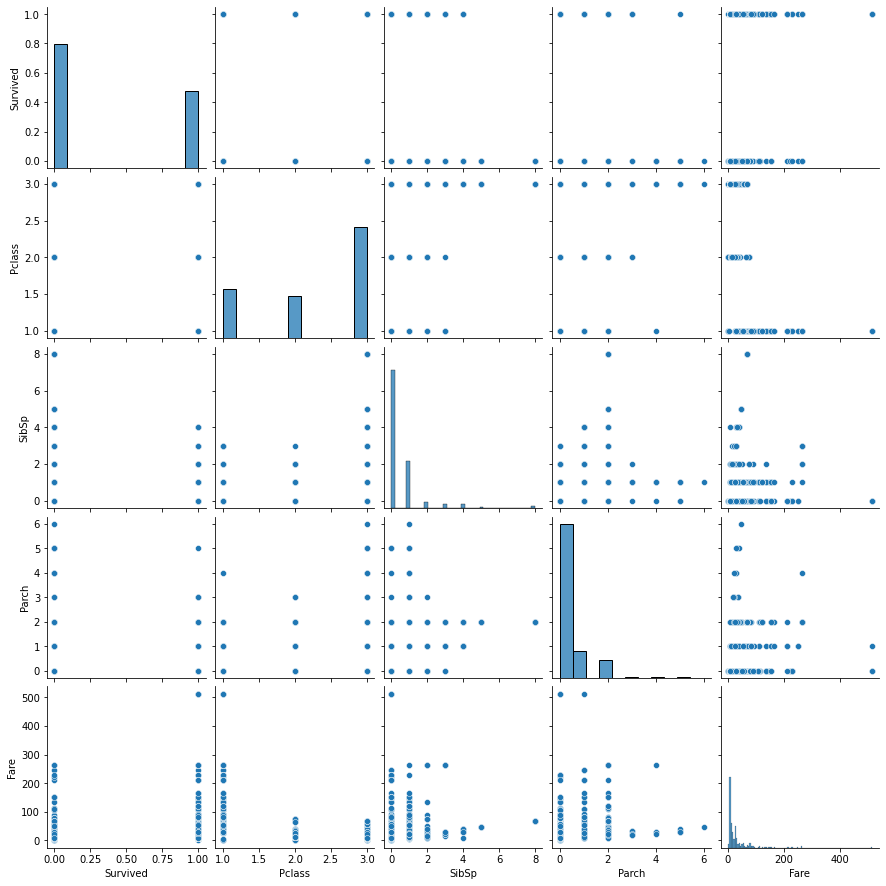

In [311]:
sns.pairplot(data = df_train_, diag_kind="hist")

In [312]:
#On Hot enconding al atributo Sex, tanto para train como para test
df_train_ = df_train_.join(pd.get_dummies(df_train_['Sex'])).drop('Sex', axis = 1)
df_test_ = df_test_.join(pd.get_dummies(df_test_['Sex'])).drop('Sex', axis = 1)


### Division datos para entrenamiento y test

In [313]:
X = df_train_.iloc[:,1:]
y = df_train_['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)

## 3.- Modelado ML

In [314]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, ).fit(X_train, y_train)


##4.- Evaluamos

In [315]:
#Score para entrenamiento
clf_log.score(X_train,y_train)

0.8009630818619583

In [316]:
#Score para validacion
clf_log.score(X_valid,y_valid)

0.7947761194029851

##5.- Predecimos algunos valores

In [317]:
df_test_.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      1
female    0
male      0
dtype: int64

In [318]:
df_test_ = df_test_.dropna()

In [319]:
clf_log.predict(df_test_)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Mejorando el Modelo

Vamos introducir incluir al anterior modelo el atributo de edad y puerto de embarque y veremos su desempeño con estos nuevos atributos

In [320]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [322]:
#Vamos a reemplazar los datos faltantes de la edad con el promedio

#obtenemos el promedio de edad
avg_age = df_train['Age'].mean()

#reemplazamos los valores
df_train['Age'] = df_train['Age'].fillna(avg_age)
df_test['Age'] = df_test['Age'].fillna(avg_age)

In [323]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [324]:
#Para el el puerto de embarque utilizamos One Hot Encoding
pd.get_dummies(df_train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [325]:
df_train_2 = df_train.join(pd.get_dummies(df_train['Embarked'])).drop('Embarked', axis = 1)
df_train_2 = df_train_2.join(pd.get_dummies(df_train_2['Sex'])).drop('Sex', axis = 1)


In [326]:
df_test_2 = df_test.join(pd.get_dummies(df_test['Embarked'])).drop('Embarked', axis = 1)
df_test_2 = df_test_2.join(pd.get_dummies(df_test_2['Sex'])).drop('Sex', axis = 1)

In [327]:
df_train_2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [328]:
df_test_2.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0


In [329]:
#Seleccionamos los atributos a introducir a nuestro modelo
drop_columns = ['PassengerId','Name','Ticket','Cabin']

df_train_2 = df_train_2.drop(drop_columns, axis = 1)
df_test_2 = df_test_2.drop(drop_columns, axis = 1)

In [330]:
df_train_2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [331]:
#Con los datos ya listos y preparados, ingresamos a nuestro modelo para entrenamiento
X = df_train_2.iloc[:,1:]
y = df_train_2['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)

In [332]:
#ajustamos parametros de maximas iteraciones, el parametro de regularizacion C
from sklearn.linear_model import LogisticRegression

clf_log2 = LogisticRegression(random_state=0, max_iter=10000, penalty= 'l2', C =0.10).fit(X_train, y_train)
print("Training Score:",clf_log2.score(X_train,y_train))
print("Validation Score:",clf_log2.score(X_valid,y_valid))

Training Score: 0.8073836276083467
Validation Score: 0.8022388059701493
